In [26]:
import pandas as pd
print("Version of pandas : ",pd.__version__)
import seaborn as sns
print("Version of seaborn : ",sns.__version__)
import matplotlib.pyplot as plt
import numpy as np
print("Version of numpy : ",np.__version__)
%matplotlib inline
import sklearn as sk
print("Version of scikit-learnt : ",sk.__version__)
import math

Version of pandas :  1.0.5
Version of seaborn :  0.10.1
Version of numpy :  1.18.5
Version of scikit-learnt :  0.23.1


In [28]:
train_data = pd.read_csv("./dataset.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
#Name isn't needed
train_data.drop("Name" , axis = 1 , inplace = True)

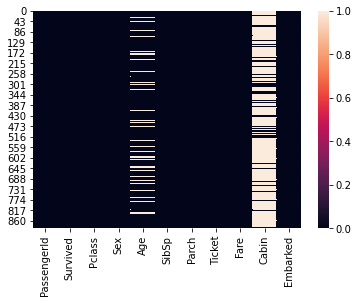

In [30]:
sns.heatmap(train_data.isna())

In [31]:
train_data.drop("Cabin" , axis = 1 , inplace = True)

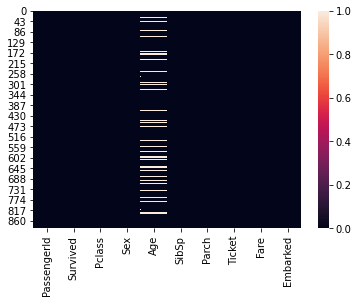

In [32]:
sns.heatmap(train_data.isna())

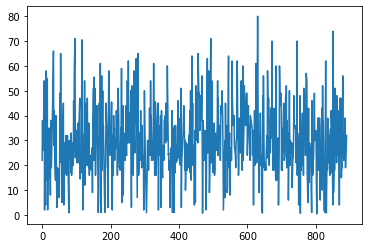

In [33]:
plt.plot(train_data['Age'].dropna())

In [34]:
data = train_data[['Age' , 'Pclass']].dropna()

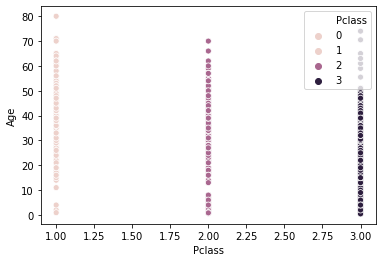

In [35]:
sns.scatterplot(data = data , x = 'Pclass' , y = 'Age' , hue = 'Pclass' , cmap = "virdis")

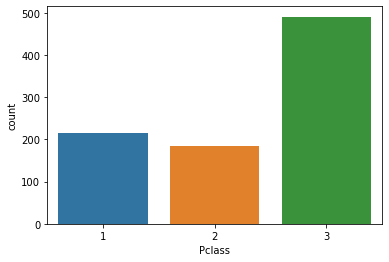

In [36]:
sns.countplot(x = 'Pclass' , data = train_data)

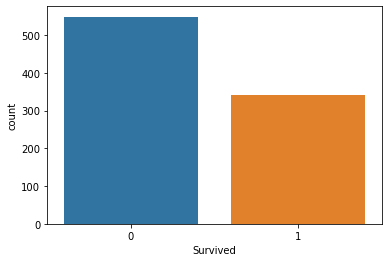

In [37]:
sns.countplot(x = 'Survived' , data = train_data)

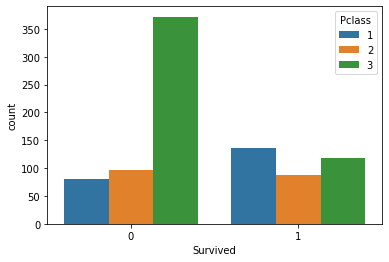

In [38]:
sns.countplot(x = 'Survived' , data = train_data , hue = "Pclass")

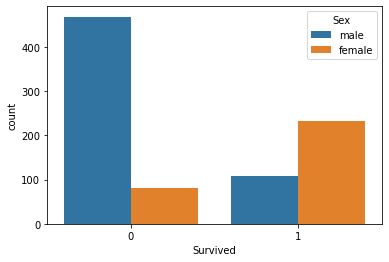

In [39]:
sns.countplot(x = 'Survived' , data = train_data , hue = "Sex")

In [40]:
avg_age_class1 = math.ceil(data[data['Pclass'] == 1]['Age'].mean())
print("avg_age_class1 : ",avg_age_class1)
avg_age_class2 = math.ceil(data[data['Pclass'] == 2]['Age'].mean())
print("avg_age_class2 : ",avg_age_class2)
avg_age_class3 = math.ceil(data[data['Pclass'] == 3]['Age'].mean())
print("avg_age_class3 : ",avg_age_class3)

avg_age_class1 :  39
avg_age_class2 :  30
avg_age_class3 :  26


In [41]:
def updateAge(List):
    age = List[0]
    Pclass = List[1]
    if pd.isnull(age):
        if Pclass == 1:
            age = avg_age_class1
        elif Pclass == 2:
            age = avg_age_class2
        else:
            age = avg_age_class1
    return age

In [42]:
train_data['Age'] = train_data[['Age' , "Pclass"]].apply(updateAge , axis = 1)

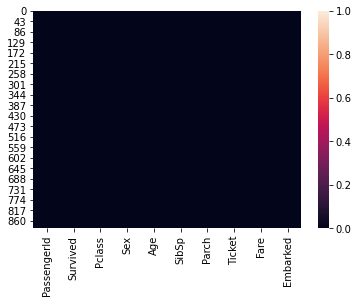

In [43]:
sns.heatmap(train_data.isna())

In [44]:
train_data.head(n = 3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [45]:
print("Parch value : " , train_data['Parch'].unique())

Parch value :  [0 1 2 5 3 4 6]


In [46]:
train_data.drop(columns = ['Embarked' , "Ticket" ] , axis = 1 , inplace = True)

In [47]:
def replaceSex(s):
    if s == "male":
        return 1
    return 0

In [48]:
train_data['Sex'] = train_data['Sex'].apply(replaceSex) #1->male  || 0->female

In [49]:
train_data.head(n = 3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250


In [50]:
train_data.drop("PassengerId" , axis = 1 , inplace = True)

In [51]:
train_data.head(n = 3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250


In [52]:
X = train_data.drop("Survived" , axis = 1)
y = train_data['Survived']

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [55]:
print("Details of train_data : ")
print("Shape of X_train : " , X_train.shape)
print("Shape of y_train : " , y_train.shape)
print("Features name : ",X_train.columns)
print("Target name : Survived")
print("\n================================\n")
print("Details of test_data : ")
print("Shape of X_test : " , X_test.shape)
print("Shape of y_test : " , y_test.shape)

Details of train_data : 
Shape of X_train :  (668, 6)
Shape of y_train :  (668,)
Features name :  Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Target name : Survived


Details of test_data : 
Shape of X_test :  (223, 6)
Shape of y_test :  (223,)


In [56]:
C_ = [0.0001,0.001,0.01,0.1,1,5,10,20,30,40,50,100]

model = {}
acc = []
val_acc = []

for i in C_:
    model_name = "model_c_" + str(i)
    model[model_name] = {}
    model_LR = LogisticRegression(C = i , solver='lbfgs').fit(X_train , y_train)
    model[model_name]['model'] = model_LR
    
    model[model_name]['acc'] = model_LR.score(X_train , y_train)
    acc.append(model[model_name]['acc'])

    model[model_name]['val_acc'] = model_LR.score(X_test , y_test)
    val_acc.append(model[model_name]['val_acc'])

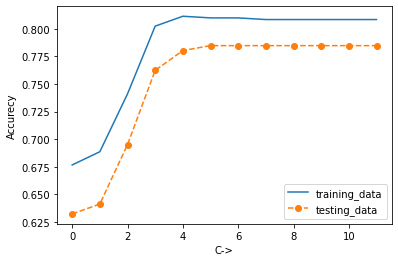

In [57]:
plt.plot(acc , label = "training_data")
plt.plot(val_acc,'o--' , label = "testing_data")
plt.ylabel("Accurecy")
plt.xlabel("C->")
plt.legend()

In [58]:
take_model = model["model_c_10"]['model']

In [59]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [60]:
print("Confusion matrix for train _data : ")
print(confusion_matrix(y_train , take_model.predict(X_train)))
print("Confusion matrix for test _data : ")
print(confusion_matrix(y_test , take_model.predict(X_test)))

Confusion matrix for train _data : 
[[375  47]
 [ 80 166]]
Confusion matrix for test _data : 
[[111  16]
 [ 32  64]]


In [61]:
print("Accurecy score for training data : %.3f %%"%( accuracy_score(y_train , take_model.predict(X_train)) * 100))
print("Accurecy score for testing data : %.3f %%"%( accuracy_score(y_test , take_model.predict(X_test)) * 100))

Accurecy score for training data : 80.988 %
Accurecy score for testing data : 78.475 %


In [62]:
print("Classification report for training data : \n============================================================\n")
print(classification_report(y_train , take_model.predict(X_train)))
print("\nClassification report for testing data : \n============================================================\n")
print(classification_report(y_test , take_model.predict(X_test)))

Classification report for training data : 

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       422
           1       0.78      0.67      0.72       246

    accuracy                           0.81       668
   macro avg       0.80      0.78      0.79       668
weighted avg       0.81      0.81      0.81       668


Classification report for testing data : 

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       127
           1       0.80      0.67      0.73        96

    accuracy                           0.78       223
   macro avg       0.79      0.77      0.77       223
weighted avg       0.79      0.78      0.78       223

